Loaded graph with 14550 nodes and 44008 edges


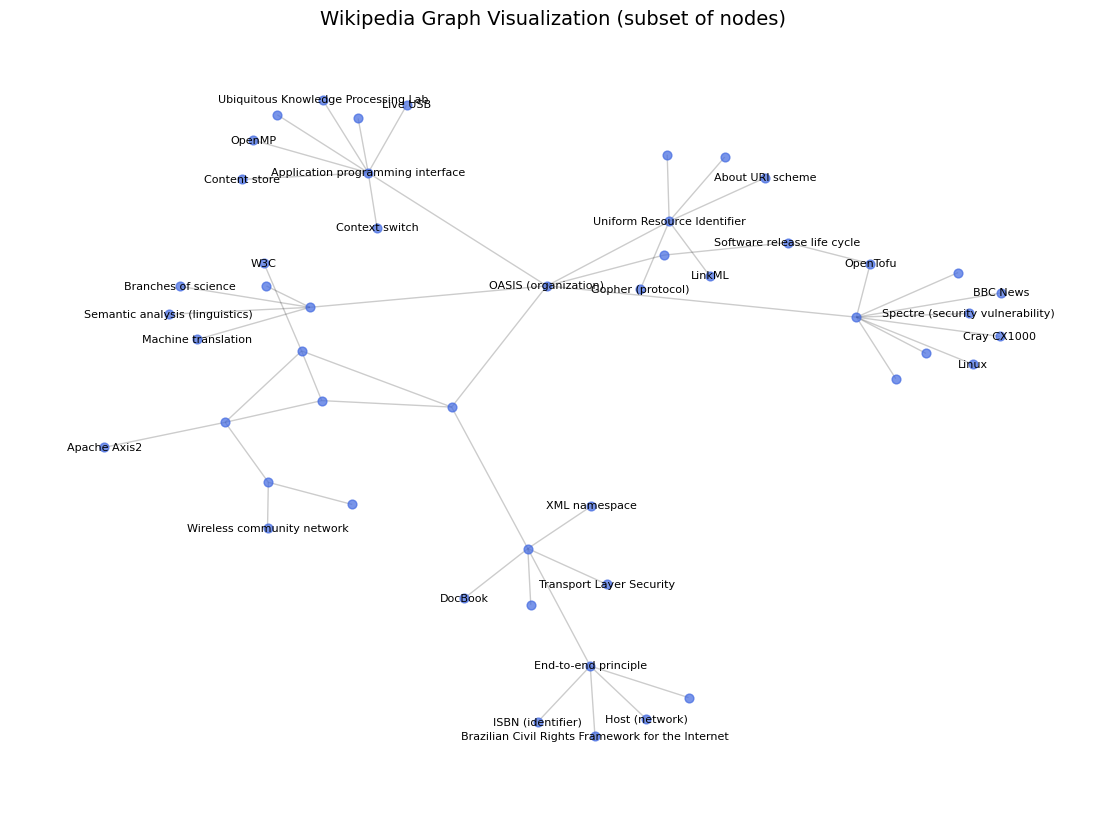

In [6]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import random

with open("../data/wiki_graph.json", "r", encoding="utf-8") as f:
    data = json.load(f)

print(f"Loaded graph with {len(data['nodes'])} nodes and {len(data['edges'])} edges")

G = nx.Graph()
G.add_nodes_from(data["nodes"].keys())
G.add_edges_from(data["edges"])

sample_size = 50
start_node = random.choice(list(G.nodes()))
sample_nodes = list(nx.bfs_tree(G, start_node).nodes)[:sample_size]
G = G.subgraph(sample_nodes).copy()

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.15, iterations=30)

nx.draw_networkx_edges(G, pos, alpha=0.2, arrows=False)
nx.draw_networkx_nodes(G, pos, node_size=40, node_color="royalblue", alpha=0.7)
nx.draw_networkx_labels(
    G,
    pos,
    labels={n: n for i, n in enumerate(G.nodes()) if i < 30},
    font_size=8,
    font_color="black",
)

plt.title("Wikipedia Graph Visualization (subset of nodes)", fontsize=14)
plt.axis("off")
plt.show()


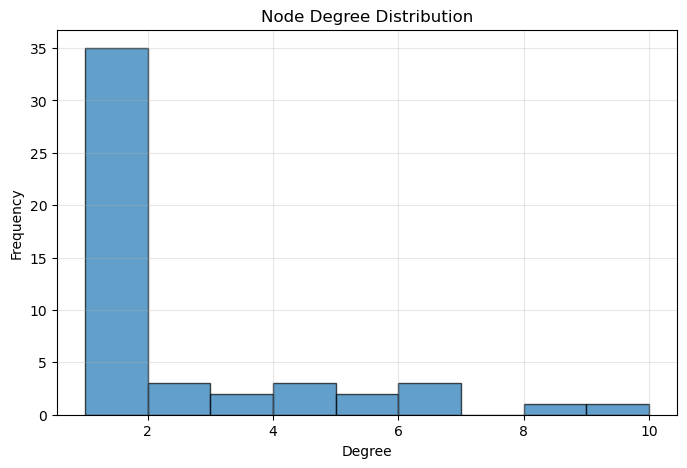

Average degree: 2.08
Max degree: 9


In [7]:
degrees = [deg for _, deg in G.degree()]
avg_degree = sum(degrees) / len(degrees)
max_degree = max(degrees)

plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=range(1, max_degree + 2), edgecolor="black", alpha=0.7)
plt.title("Node Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

print(f"Average degree: {avg_degree:.2f}")
print(f"Max degree: {max_degree}")